<a href="https://colab.research.google.com/github/ykato27/Auto-Encorder/blob/main/Convolutional_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Convolutional Autoencoder

In [1]:
!pip install pycodestyle flake8 pycodestyle_magic

     |████████████████████████████████| 41 kB 539 kB/s 
     |████████████████████████████████| 73 kB 1.3 MB/s 
     |████████████████████████████████| 68 kB 6.4 MB/s 


In [2]:
%load_ext pycodestyle_magic

In [3]:
import numpy as np
from keras.datasets import mnist
from keras.layers import Conv2D, Dense, Input, MaxPooling2D, UpSampling2D
from keras.models import Model

In [4]:
input_img = Input(shape=(28, 28, 1))

x = Conv2D(16, (3, 3), activation="relu", padding="same")(input_img)
x = MaxPooling2D((2, 2), padding="same")(x)
x = Conv2D(8, (3, 3), activation="relu", padding="same")(x)
x = MaxPooling2D((2, 2), padding="same")(x)
x = Conv2D(8, (3, 3), activation="relu", padding="same")(x)
encoded = MaxPooling2D((2, 2), padding="same")(x)

x = Conv2D(8, (3, 3), activation="relu", padding="same")(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation="relu", padding="same")(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation="relu")(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

autoencoder = Model(input_img, decoded)

In [5]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)           0     

In [6]:
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

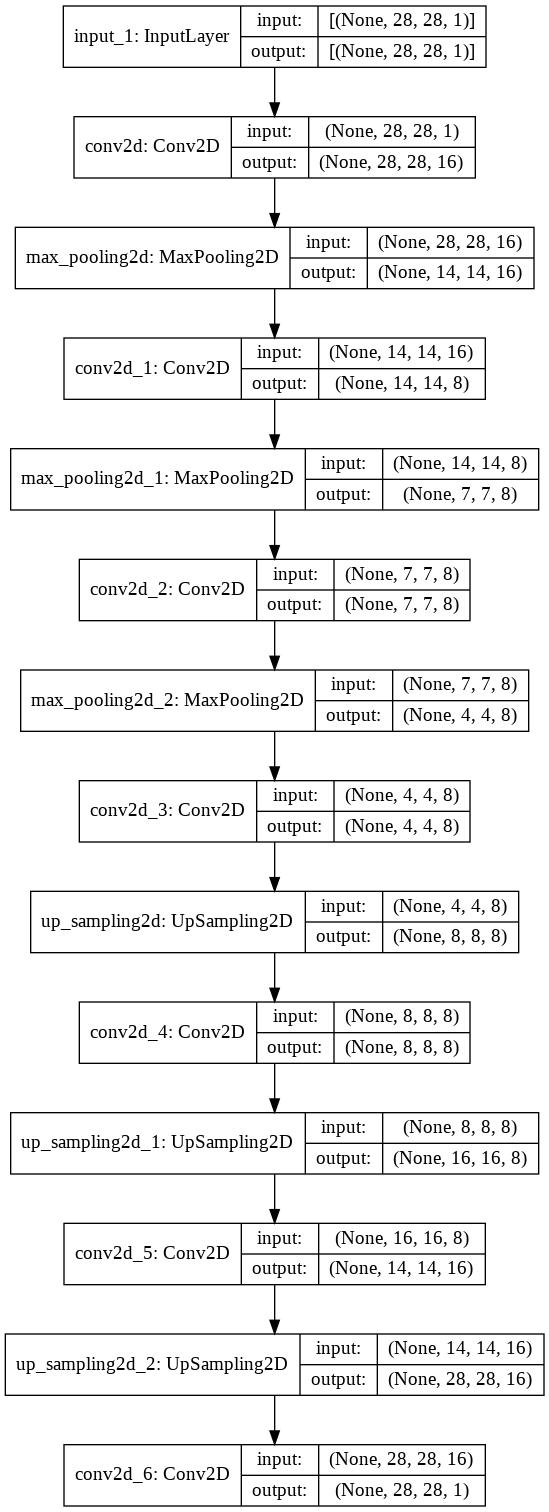

In [7]:
from tensorflow.python.keras.utils.vis_utils import plot_model

# モデルの描画
plot_model(autoencoder, to_file="architecture.png", show_shapes=True)

In [8]:
import numpy as np
from keras.datasets import mnist

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

print(x_train.shape)
print(x_test.shape)
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
print(x_train.shape)
print(x_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [9]:
import keras

log_filepath = "./logs/"
tb_cb = keras.callbacks.TensorBoard(
    log_dir=log_filepath, histogram_freq=1, write_graph=True, write_images=True
)

In [10]:
autoencoder.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    shuffle=True,
    callbacks=[tb_cb],
    validation_data=(x_test, x_test),
)

Epoch 1/50
469/469 [==============================] - 100s 178ms/step - loss: 0.3065 - val_loss: 0.1501
Epoch 2/50
469/469 [==============================] - 83s 178ms/step - loss: 0.1425 - val_loss: 0.1262
Epoch 3/50
469/469 [==============================] - 82s 175ms/step - loss: 0.1244 - val_loss: 0.1169
Epoch 4/50
469/469 [==============================] - 85s 181ms/step - loss: 0.1169 - val_loss: 0.1120
Epoch 5/50
469/469 [==============================] - 80s 170ms/step - loss: 0.1127 - val_loss: 0.1088
Epoch 6/50
469/469 [==============================] - 86s 184ms/step - loss: 0.1093 - val_loss: 0.1066
Epoch 7/50
469/469 [==============================] - 86s 183ms/step - loss: 0.1071 - val_loss: 0.1051
Epoch 8/50
469/469 [==============================] - 86s 183ms/step - loss: 0.1054 - val_loss: 0.1031
Epoch 9/50
469/469 [==============================] - 84s 179ms/step - loss: 0.1041 - val_loss: 0.1028
Epoch 10/50
469/469 [==============================] - 81s 173ms/step - 

In [11]:
import matplotlib.pyplot as plt

# テスト画像を変換
decoded_imgs = autoencoder.predict(x_test)
print(decoded_imgs.shape)

(10000, 28, 28, 1)


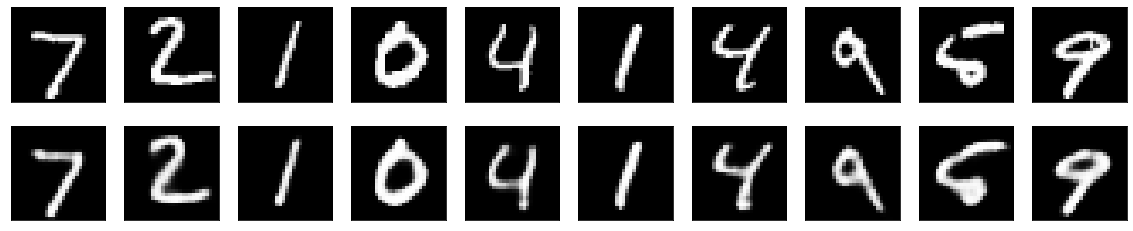

In [12]:
# 何個表示するか
# plt.subplot(行数, 列数, 何番目のプロットか)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # オリジナルのテスト画像を表示
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 変換された画像を表示
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)  # 軸の値の表示を無効化
    ax.get_yaxis().set_visible(False)  # 軸の値の表示を無効化
plt.show()

# エンコードされた画像も可視化してみましょう。(8, 4, 4) という形

In [13]:
import matplotlib.pyplot as plt

n = 20
encoder = Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test[:n])
print(encoded_imgs.shape)

(20, 4, 4, 8)


エンコードされた画像は、このように人間には認識できない画像になっている。
Matplotlibはデフォルトでは補完して出力するようになっているが、4x4の解像度が低い画像は生の値で出力した方が良い
interpolation='none'と指定

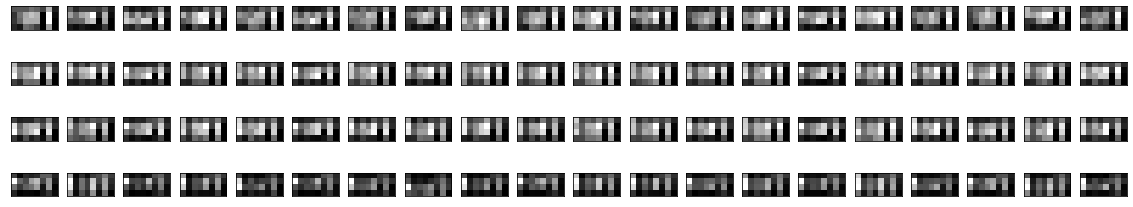

In [14]:
plt.figure(figsize=(20, 8))
for i in range(n):
    for j in range(4):
        ax = plt.subplot(8, n, j * n + i + 1)
        plt.imshow(encoded_imgs[i][j], interpolation="none")
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)